# STAT 301 Final Report

# Introduction: 


Coronary heart disease (CAD) is the leading cause of death in the United States (Menees & Bates, 2010), and the second leading cause of death in Canada (Public Health Agency of Canada, 2017). Typically, CAD is caused when plaque builds up in arteries, restricting blood flow (Menees & Bates, 2010). This causes an imbalance between the oxygen supply and demand of the heart, which often manifests as chest pain, also known as angina pectoris (Menees & Bates, 2010). While there are many precursors to CAD, including high cholesterol, tobacco use, and a family history of CAD (Menees & Bates, 2010), it is impossible to predict CAD using a single variable. For example, a resting electrocardiogram (ECG) is performed on all patients with suspected CAD, but a normal ECG does not exclude the patient from having CAD (Menees & Bates, 2010). Thus, due to the prevalence and severity of CAD, it is of keen interest to develop CAD probability models that can be universally applied to patients worldwide.

The dataset we used for our analysis is from Detrano et al. (1989), whose focus was also to generate a model to accurately predict the probability of CAD. The dataset includes clinical and test variables for 1025 patients from hospitals in Cleveland, Budapest, Zurich, Basel, and Long Beach (Detrano et al., 1989). These variables include the age of the patient (age), sex of the patient (sex), chest pain type (cp), resting blood pressure upon admission (trestbps), serum cholesterol (chol), if fasting blood sugar > 120 mg/dl (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced chest pain (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), the number of major vessels coloured by fluoroscopy (ca), if the patient has thalassemia (thal), and the presence of CAD (target).

# Questions: 

Can we predict the presence of heart disease in a patient using either an easily measurable subset of variables (sex, chest pain type, age, resting blood pressure) or the full variable list by using different algorithm (forward/backward selection and LASSO). 

Which algorithm (forward/backward selection, LASSO) produces the most accurate/precise model?

## (2) Methods and Results

### a) Exploratory Data Analysis (EDA)

In [1]:
# Main developer: Michelle H. 
# Contributor: Anna M. 

library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(cowplot)



# Loading in the dataset from Kaggle 
heart_MH <- read.csv("heart.csv")


#Checking for missing values 
sum(is.na(heart_MH))


#Number of rows (observations) within the set 
head(heart_MH)
nrow(heart_MH)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

[1] 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


[1] 1025

In [5]:
# Main developer: Anna M. 
# Contributor: Michelle H. 

# Convert categorical variables

heart_MH$sex <- as.factor(heart_MH$sex)
heart_MH$cp <- as.factor(heart_MH$cp)
heart_MH$fbs <- as.factor(heart_MH$fbs)
heart_MH$restecg <- as.factor(heart_MH$restecg) 
heart_MH$exang <- as.factor(heart_MH$exang) 
heart_MH$slope <- as.factor(heart_MH$slope) 
heart_MH$ca <- as.factor(heart_MH$ca) 
heart_MH$thal <- as.factor(heart_MH$thal) 
heart_MH$target <- as.factor(heart_MH$target)

# Rename columns for easier understanding
heart_data <- heart_MH %>% 
rename(chest_pain_type = cp, cholesterol = chol, resting_bp = trestbps, fasting_blood_sugar = fbs, resting_ecg = restecg, max_heart_rate = thalach, exercise_induced_angina = exang, ST_depression = oldpeak, vessels_num = ca)

head(heart_data)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [13]:
# Main developer: Vaibhav S.  
# Contributor: Michelle H., Anna M. 

#Correlation matrix 

corr_matrix_heart <- heart_data %>%
  mutate(Response = as.numeric(target)) %>%
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")


# Plotting the correlation matrix
options(repr.plot.width = 12, repr.plot.height = 10)
plot_corr_matrix_heart <- corr_matrix_heart %>%
  ggplot(aes(x = variable1, y = variable2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller(name = "Correlation Coefficient",
                       palette = "YlOrRd",
                       direction = 1, limits = c(-1, 1)) +
  labs(x = "First Variable", y = "Second Variable") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
        axis.text.y = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12),
        legend.key.size = unit(2, "cm")) +
  coord_fixed() +
  geom_text(aes(label = round(correlation, 2)), color = "black", size = 4)

# Display the correlation matrix plot
plot_corr_matrix_heart

ERROR: Error in cor(.): 'x' must be numeric


### Interpretation: 
There is no significant correlation between any of the variables. 

We will create a couple graphs to represent key relationships using selected variables in relation to the target variable. 

In [7]:
library(ggplot2)

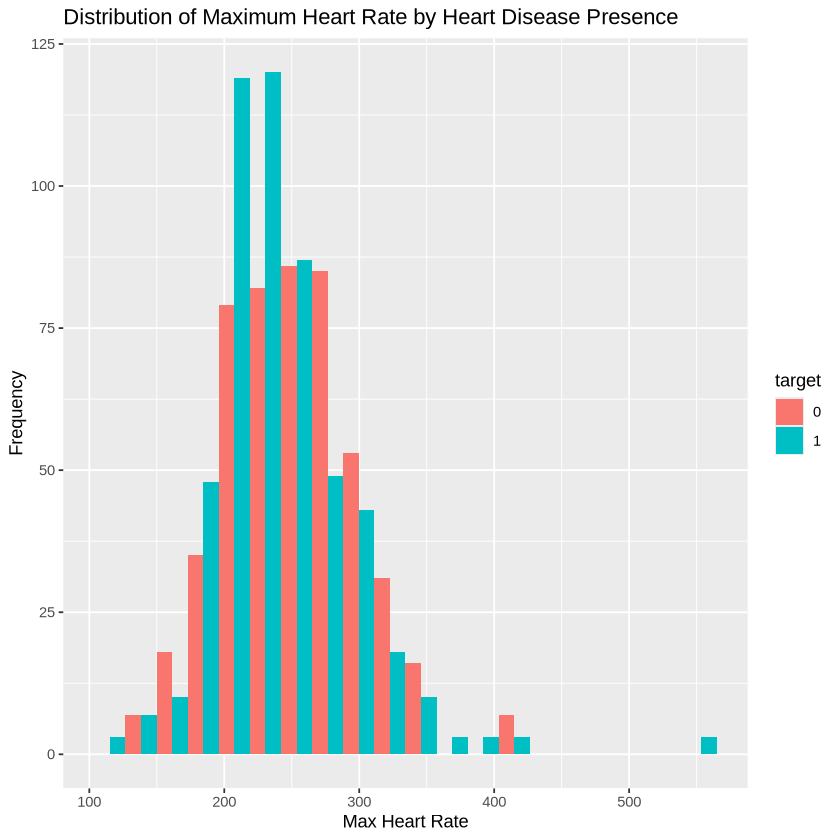

In [8]:
# Main developer: Anna M. 
# Contributor: None


ggplot(heart_data, aes(x = cholesterol, fill = target)) +
geom_histogram(position = "dodge", bins = 20) +
labs(title = "Distribution of Maximum Heart Rate by Heart Disease Presence",
       x = "Max Heart Rate", y = "Frequency")

Based on the histogram above we can imply that cholesterol level is an important indicator of heart disease

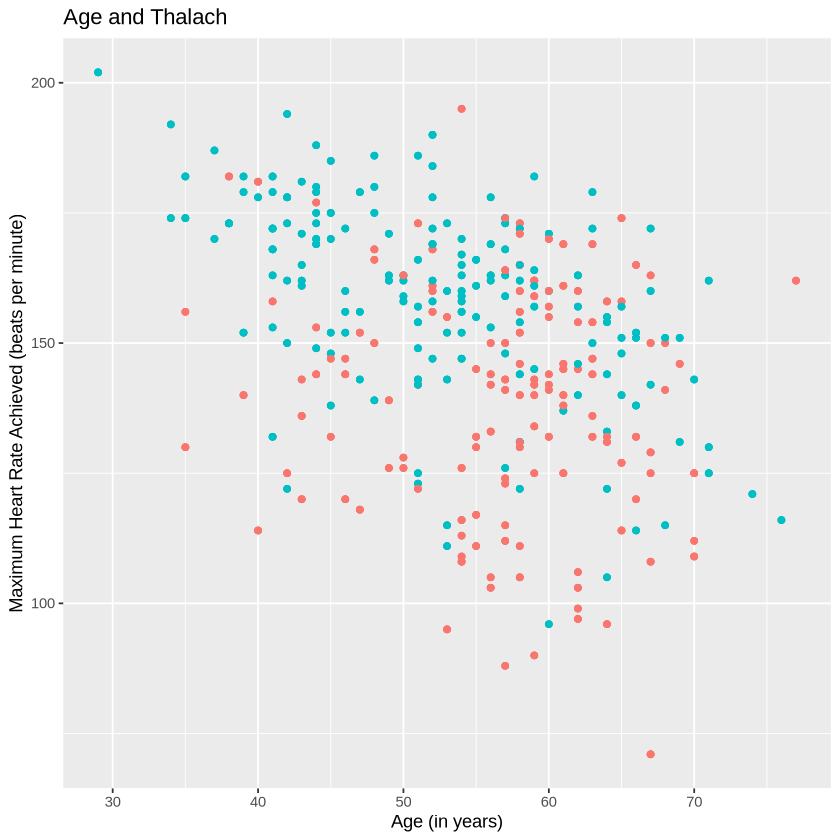

In [9]:
# Main developer: Michelle H.  
# Contributor: None

heart_plot1 <- heart_data |>
  ggplot(aes(x = age, 
             y = max_heart_rate, 
             color = target)) +
  labs(x = "Age (in years)", y = "Maximum Heart Rate Achieved (beats per minute)") +
  theme(legend.position = "none") +
  geom_point() +
  ggtitle("Age and Thalach") 

heart_plot1

This scatterplot explores the relationship between age and maximum heart rate achieved. There is no clear relationship. 

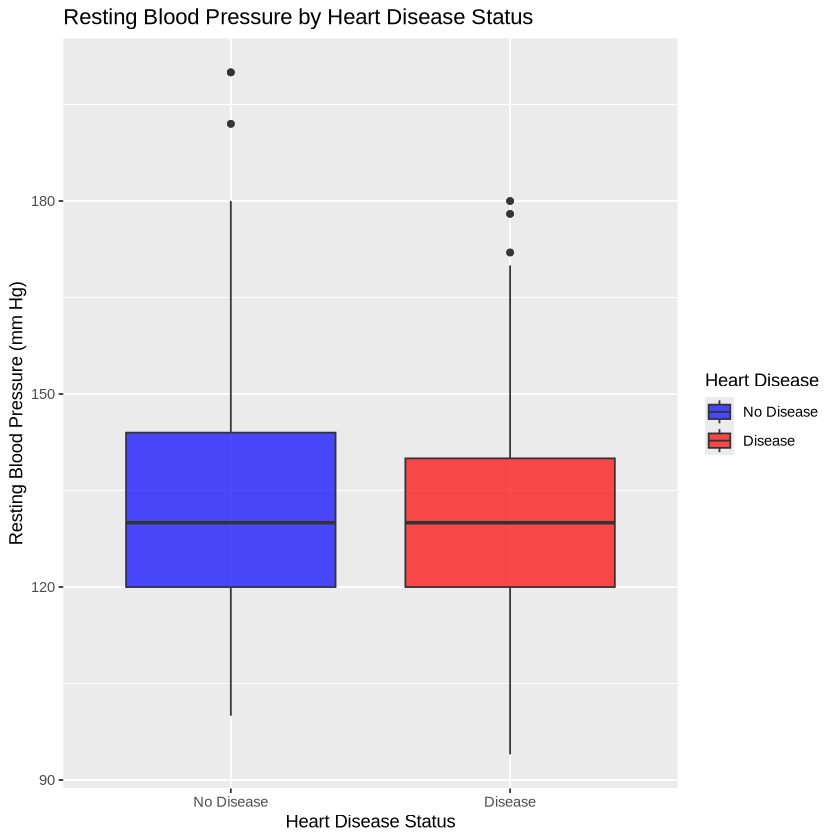

In [10]:
# Main developer: Vaibhav S.
# Contributor: None

# Resting Blood Pressure by Heart Disease Status
ggplot(heart_data, aes(x = factor(target), y = resting_bp, fill = factor(target))) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("0" = "blue", "1" = "red"), labels = c("No Disease", "Disease")) +
  labs(title = "Resting Blood Pressure by Heart Disease Status", x = "Heart Disease Status", y = "Resting Blood Pressure (mm Hg)", fill = "Heart Disease") +
  scale_x_discrete(labels = c("0" = "No Disease", "1" = "Disease"))

This boxplot visualizes the resting blood pressure (`trestbps`) distribution for patients with and without heart disease.

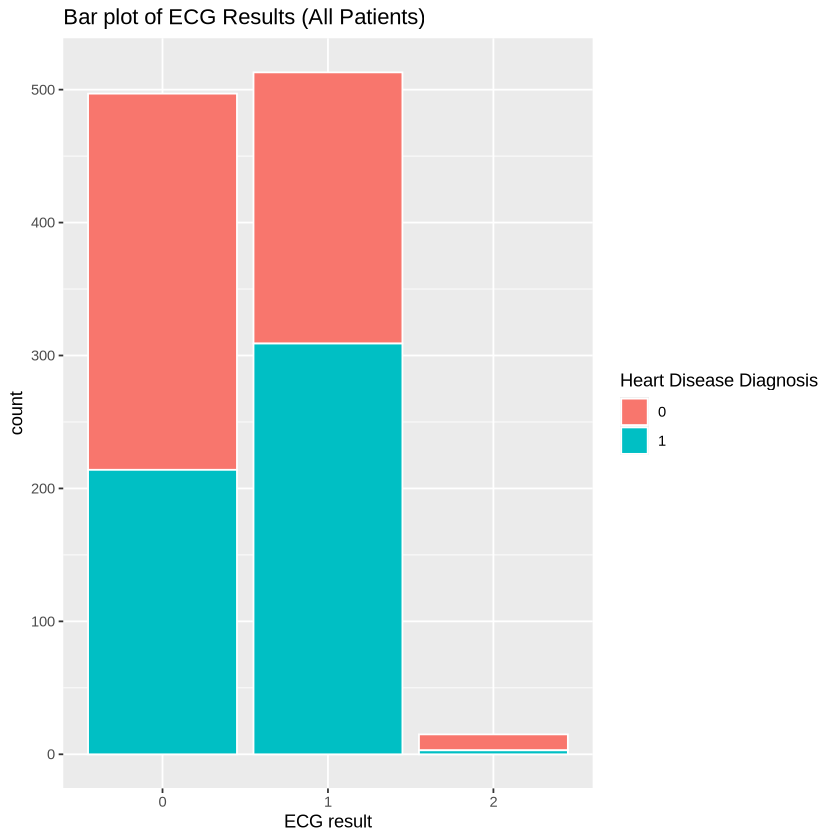

In [11]:
# Main developer: Paul E. 
# Contributor: None

ecg_plot <- ggplot(heart_data, aes(x = resting_ecg)) +
    geom_bar(aes(fill = target), color = "white") +
    labs(x = "ECG result",
         title = "Bar plot of ECG Results (All Patients)") +
    scale_fill_discrete(name = "Heart Disease Diagnosis")
         
ecg_plot

This bar plot visualizes `ECG` to `target`. 

For all the plots, we colored relative to `target`. 

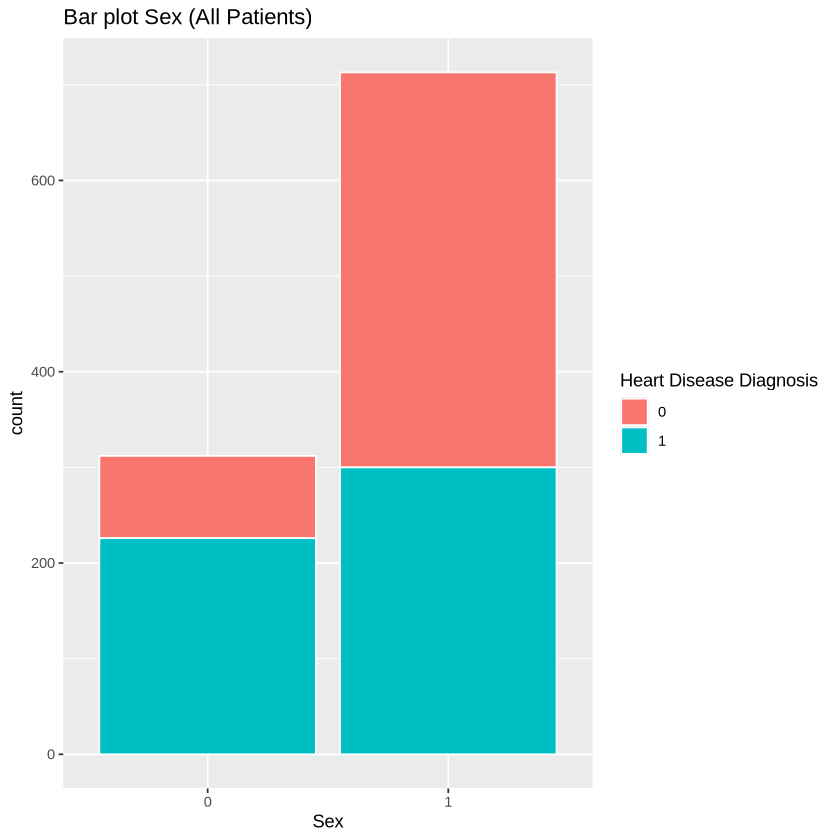

In [12]:
# Main developer: Anna M. 
# Contributor: None

#0 = female; 1 = male 

ggplot(heart_data, aes(x = sex)) +
    geom_bar(aes(fill = target), color = "white") +
    labs(x = "Sex",
         title = "Bar plot Sex (All Patients)") +
    scale_fill_discrete(name = "Heart Disease Diagnosis")

Based on this bar plot we can see that the dataset is imbalanced, there are more males than females. Even if `sex` is a strong predictor, the imbalance may lead to misleading importance scores for this feature because the dataset is not representative of the population.

### b) Methods: Plan

### Methods
To start, the dataset was split into a selection and training dataset, with a 30/70 split. We used forward selection, backward selection and LASSO regression to build the most accurate models possible.

### Forward and Backward Selection 

For forward and backward selection, the ```regsubsets``` function was used to understand which variables would be included for a model of a given size. The model with the highest **adjusted R^2** was selected and a ```glm``` model was fit using the variables included. 




### Lasso 

Lasso regularization that performs feature selection and coefficient estimation by penalizing large coefficients. This approach enables the model to focus on the most predictive features.

First cross-validation was performed on the model matrix to obtain the optimal parameter for lambda. The chosen lambda value was the one which provided the largest AUC score. Then using glmnet the logistic regression model was fitted by specifying family = "binomial" and, while applying asso regularization by specifying alpha = 1.

The AUC for the model is 0.948


### Subset

We selected a couple easily measurable variables and created a `glm` model using those variables to predict `target`. 

Confusion matrix and AUC plots were created for all types of models used. 


In [43]:
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(faraway)
library(broom)
library(leaps)
library(mltools)
library(tidyverse)
library(caret)
library(pROC)
library(boot)
library(glmnet)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma



Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


The following objects are masked from ‘package:faraway’:

    logit, melanoma




In [35]:
set.seed(584)

# Main developer: Paul E. 
# Contributor: None

# splitting data into testing and training set
heart_data <- heart_data %>%
    mutate(ID = row_number())

training_data <- 
    heart_data %>%
    slice_sample(prop = 0.70, replace = FALSE)

selection_data <- 
    heart_data %>%
    anti_join(training_data, by = "ID")

training_data <- 
    training_data %>% 
    select(-"ID")

selection_data <- 
    selection_data %>% 
    select(-"ID")

head(training_data)
nrow(training_data)

head(selection_data)
nrow(selection_data)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
2,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
3,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
5,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
6,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1


[1] 717

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
4,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
5,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
6,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


[1] 308

In [38]:
# Main developer: Paul E. 
# Contributor: None

# using backwards selection
backward_sel <- 
    regsubsets(
        x = target ~ ., 
        nvmax = 22,
        data = selection_data,
        method = "backward",
    )

backward_sel_summary <- summary(backward_sel)

backward_sel_summary_df <- tibble(
    n_input_variables = 1:22,
    RSQ = backward_sel_summary$rsq,
    RSS = backward_sel_summary$rss,
    ADJ.R2 = backward_sel_summary$adjr2
)

backward_sel_summary
backward_sel_summary_df

Subset selection object
Call: regsubsets.formula(x = target ~ ., nvmax = 22, data = selection_data, 
    method = "backward", )
22 Variables  (and intercept)
                         Forced in Forced out
age                          FALSE      FALSE
sex1                         FALSE      FALSE
chest_pain_type1             FALSE      FALSE
chest_pain_type2             FALSE      FALSE
chest_pain_type3             FALSE      FALSE
resting_bp                   FALSE      FALSE
cholesterol                  FALSE      FALSE
fasting_blood_sugar1         FALSE      FALSE
resting_ecg1                 FALSE      FALSE
resting_ecg2                 FALSE      FALSE
max_heart_rate               FALSE      FALSE
exercise_induced_angina1     FALSE      FALSE
ST_depression                FALSE      FALSE
slope1                       FALSE      FALSE
slope2                       FALSE      FALSE
vessels_num1                 FALSE      FALSE
vessels_num2                 FALSE      FALSE
vessels_num3  

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.3270270,51.74026,0.3248278
2,0.3715693,48.31571,0.3674485
3,0.4292109,43.88404,0.4235781
4,0.4676706,40.92714,0.4606432
5,0.5093127,37.72557,0.5011887
6,0.5342398,35.80910,0.5249555
7,0.5606360,33.77968,0.5503841
8,0.5703765,33.03080,0.5588815
9,0.5811821,32.20002,0.5685332


In [41]:
# Main developer: Paul E. 
# Contributor: None

# building model based on results of backward selection
backward_sel_model <- glm(target ~ sex + chest_pain_type + resting_bp + cholesterol + resting_ecg + max_heart_rate + ST_depression + slope + vessels_num + thal, 
                           data = training_data, 
                           family = "binomial")

In [44]:
# Main developer: Paul E. 
# Contributor: None

# building the confusion matrix
backward_pred_class <- 
  round(predict(backward_sel_model, type = "response"), 0)

backward_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(backward_pred_class),
    reference = as.factor(training_data$target),
    positive = '1'
)

In [74]:
# Main developer: Paul E. 
# Contributor: Michelle H. 

#same thing, this time for forward selection
forward_sel <- 
    regsubsets(
        x = target ~ ., 
        nvmax = 22,
        data = selection_data,
        method = "forward",
    )

forward_sel_summary <- summary(forward_sel)

forward_sel_summary_df <- tibble(
    n_input_variables = 1:22,
    RSQ = forward_sel_summary$rsq,
    RSS = forward_sel_summary$rss,
    ADJ.R2 = forward_sel_summary$adjr2
)

forward_sel_summary
forward_sel_summary_df

forward_sel_model <- glm(target ~ age + sex + chest_pain_type + resting_bp + resting_ecg + max_heart_rate + exercise_induced_angina + ST_depression + slope + vessels_num + thal, 
                           data = training_data, 
                           family = "binomial")

forward_pred_class <- 
  round(predict(forward_sel_model, type = "response"), 0)

forward_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(forward_pred_class),
    reference = as.factor(training_data$target),
    positive = '1'
)

Subset selection object
Call: regsubsets.formula(x = target ~ ., nvmax = 22, data = selection_data, 
    method = "forward", )
22 Variables  (and intercept)
                         Forced in Forced out
age                          FALSE      FALSE
sex1                         FALSE      FALSE
chest_pain_type1             FALSE      FALSE
chest_pain_type2             FALSE      FALSE
chest_pain_type3             FALSE      FALSE
resting_bp                   FALSE      FALSE
cholesterol                  FALSE      FALSE
fasting_blood_sugar1         FALSE      FALSE
resting_ecg1                 FALSE      FALSE
resting_ecg2                 FALSE      FALSE
max_heart_rate               FALSE      FALSE
exercise_induced_angina1     FALSE      FALSE
ST_depression                FALSE      FALSE
slope1                       FALSE      FALSE
slope2                       FALSE      FALSE
vessels_num1                 FALSE      FALSE
vessels_num2                 FALSE      FALSE
vessels_num3   

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.3270270,51.74026,0.3248278
2,0.4043702,45.79388,0.4004644
3,0.4422578,42.88096,0.4367537
4,0.4874145,39.40917,0.4806477
5,0.5098522,37.68409,0.5017372
6,0.5268403,36.37800,0.5174085
7,0.5394313,35.40996,0.5286847
8,0.5555777,34.16857,0.5436868
9,0.5767535,32.54051,0.5639709


In [75]:
# Main developer: Paul E. 
# Contributor: None

#comparing confusion matrices
backward_confusion_matrix
forward_confusion_matrix

#we can see that despite the minor differences in model selection, there is little difference in prediction performance

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 291  36
         1  60 330
                                         
               Accuracy : 0.8661         
                 95% CI : (0.839, 0.8902)
    No Information Rate : 0.5105         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7317         
                                         
 Mcnemar's Test P-Value : 0.0189         
                                         
            Sensitivity : 0.9016         
            Specificity : 0.8291         
         Pos Pred Value : 0.8462         
         Neg Pred Value : 0.8899         
             Prevalence : 0.5105         
         Detection Rate : 0.4603         
   Detection Prevalence : 0.5439         
      Balanced Accuracy : 0.8653         
                                         
       'Positive' Class : 1              
                                         

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 300  29
         1  51 337
                                          
               Accuracy : 0.8884          
                 95% CI : (0.8631, 0.9105)
    No Information Rate : 0.5105          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7765          
                                          
 Mcnemar's Test P-Value : 0.01888         
                                          
            Sensitivity : 0.9208          
            Specificity : 0.8547          
         Pos Pred Value : 0.8686          
         Neg Pred Value : 0.9119          
             Prevalence : 0.5105          
         Detection Rate : 0.4700          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.8877          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



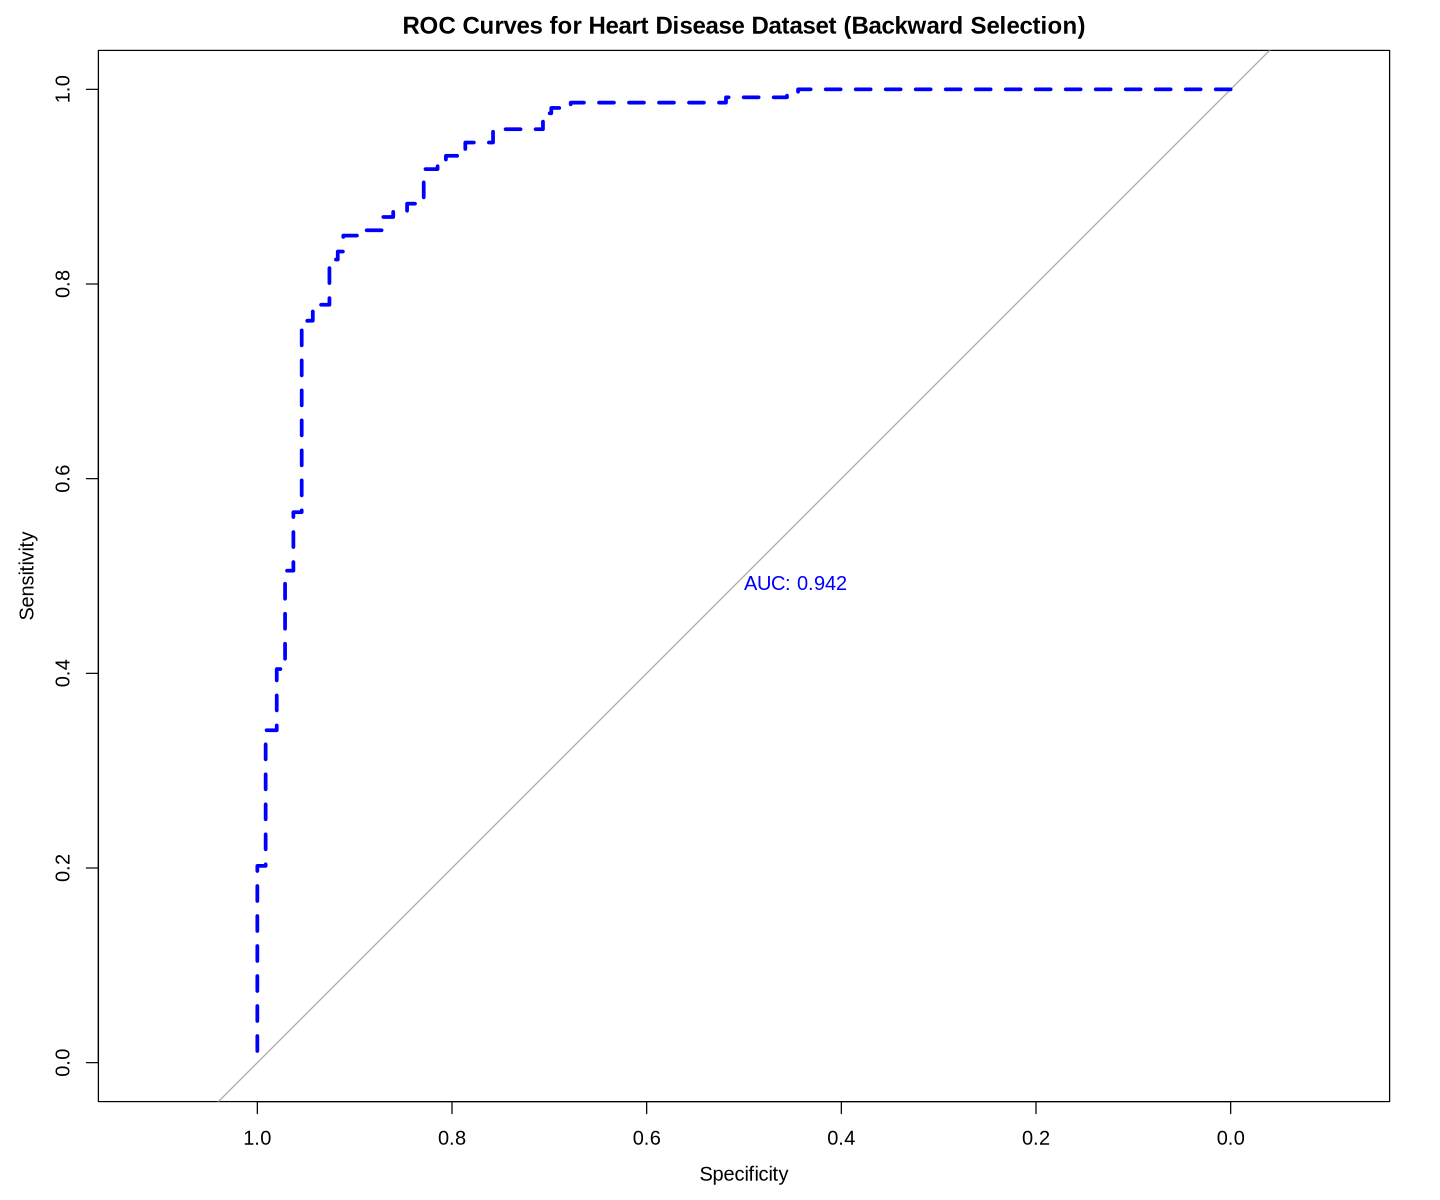

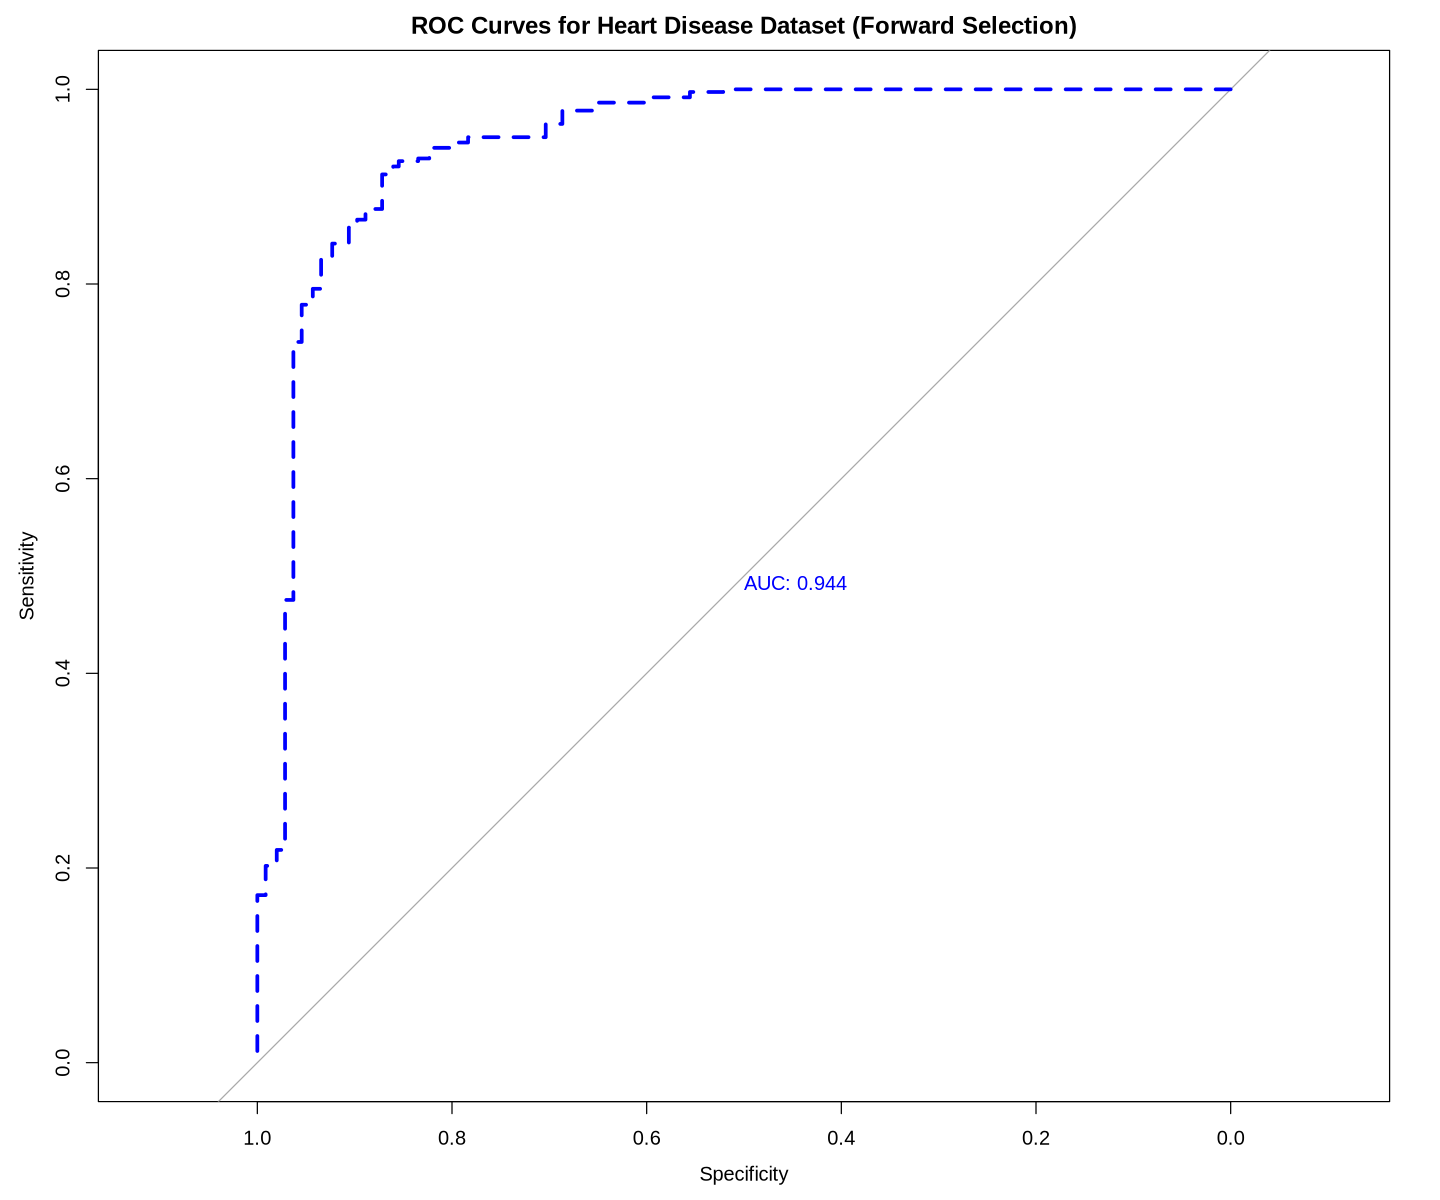

In [62]:
# Main developer: Paul E. 
# Contributor: None

# ROC curve for backward selection model
ROC_backward <- 
    roc(response = training_data$target, 
        predictor = predict(backward_sel_model, type = "response"))

plot(ROC_backward,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Heart Disease Dataset (Backward Selection)")


ROC_foreward <- 
    roc(response = training_data$target, 
        predictor = predict(foreward_sel_model, type = "response"))

plot(ROC_foreward,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Heart Disease Dataset (Forward Selection)")

### Lasso Regression

In [51]:
# Main developer: Anna M. 
# Contributor: None

set.seed(584)

heart_data <- heart_data %>% mutate(ID = row_number())

heart_train <- 
    heart_data %>% 
    slice_sample(prop = 0.70)

heart_test <- 
    heart_data %>% 
    anti_join(heart_train, by = "ID")

heart_train <- heart_train  %>% select(-ID)
heart_test <- heart_test  %>% select(-ID)

head(heart_train)
nrow(heart_train)
nrow(heart_test)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
2,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
3,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
5,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
6,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1


[1] 717

[1] 308

In [52]:
# Main developer: Anna M. 
# Contributor: None

# Use cross-validation to select the optimal regularization parameter (λ)

model_matrix_X_train <- 
    model.matrix(object = target ~ .,
                 data = heart_train)[, -1]

matrix_Y_train <- 
    as.matrix(heart_train$target, ncol = 1)

Now we need to find the value of $\lambda$ that provides the largest average AUC.

In [53]:
# Main developer: Anna M. 
# Contributor: None

heart_cv_lambda_LASSO <- cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = "binomial",
  type.measure = "auc",
  nfolds = 5
)

heart_cv_lambda_LASSO


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

      Lambda Index Measure       SE Nonzero
min 0.002166    52  0.9337 0.012168      22
1se 0.024327    26  0.9218 0.008666      16

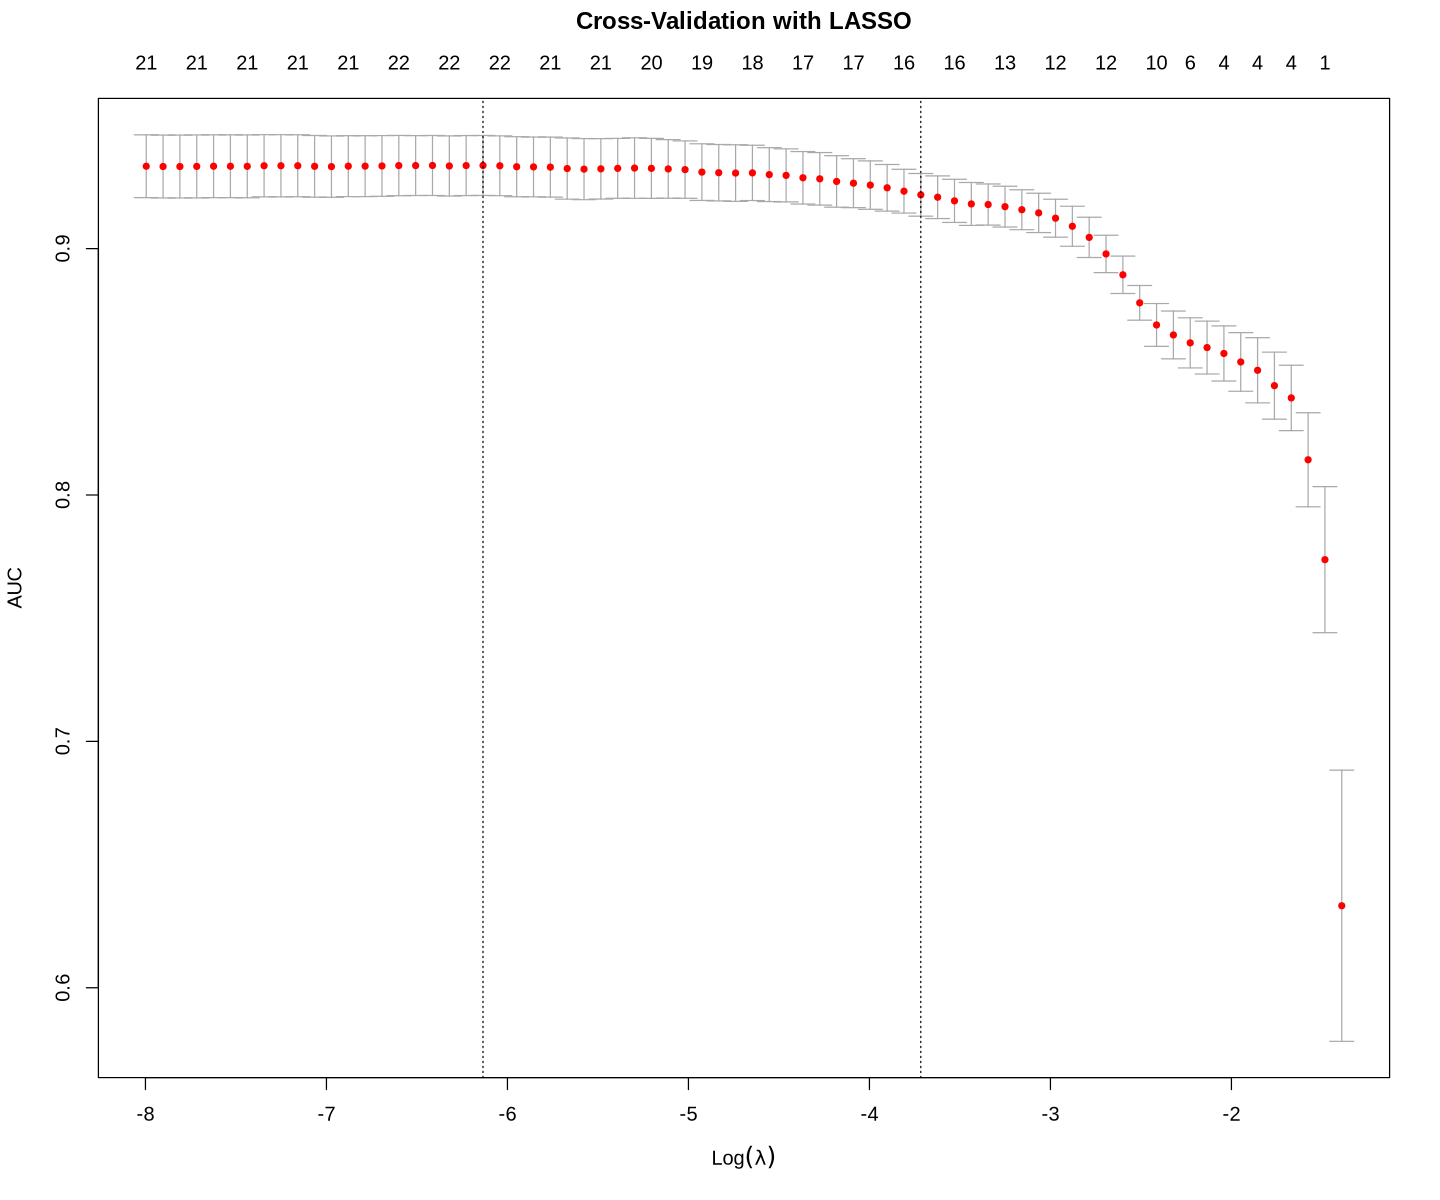

In [54]:
# Main developer: Anna M. 
# Contributor: None

plot(heart_cv_lambda_LASSO, main = "Cross-Validation with LASSO\n\n")

In [55]:
# Main developer: Anna M. 
# Contributor: None

# Lambda min gives the best predictive performance
heart_cv_lambda_LASSO$cvm[heart_cv_lambda_LASSO$index["min",]]
heart_cv_lambda_LASSO$cvm[heart_cv_lambda_LASSO$index["1se",]]

[1] 0.9337437

[1] 0.9218308

In [56]:
# Main developer: Anna M. 
# Contributor: None


# Choose lambda min
heart_lambda_AUC_LASSO <- round(heart_cv_lambda_LASSO$lambda.min, 5)
heart_lambda_AUC_LASSO

[1] 0.00217

In [57]:
# Main developer: Anna M. 
# Contributor: None

heart_LASSO_AUC <- 
    glmnet(
        x = model_matrix_X_train, 
        y = matrix_Y_train,
        alpha = 1,
        family = "binomial",
        lambda = heart_lambda_AUC_LASSO)

In [58]:
# Main developer: Anna M. 
# Contributor: None

coef(heart_LASSO_AUC)

23 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)               1.634898135
age                       0.018854762
sex1                     -1.809594746
chest_pain_type1          0.559976489
chest_pain_type2          1.662195386
chest_pain_type3          1.813747770
resting_bp               -0.023565189
cholesterol              -0.006083769
fasting_blood_sugar1      0.411547463
resting_ecg1              0.039575130
resting_ecg2             -0.038830554
max_heart_rate            0.022743948
exercise_induced_angina1 -0.754232861
ST_depression            -0.355566389
slope1                   -0.584272227
slope2                    0.786616062
vessels_num1             -2.232429037
vessels_num2             -3.127212015
vessels_num3             -2.840993854
vessels_num4              1.392513035
thal1                     1.171802725
thal2                     0.986096755
thal3                    -0.281478079

In [59]:
# Main developer: Anna M. 
# Contributor: None

model_matrix_X_test <- 
    model.matrix(object = target ~ .,
                 data = heart_test)[, -1]

predicted_probabilities <- predict(heart_LASSO_AUC, 
                                   newx = model_matrix_X_test, 
                                   type = "response")

# ROC
ROC_lasso <- roc(
  response = heart_test$target,
  predictor = predicted_probabilities[,"s0"]
)

predicted_labels <- ifelse(predicted_probabilities[,"s0"] > 0.5, 1, 0)

confusion_matrix <- confusionMatrix(factor(predicted_labels), factor(heart_test$target))

accuracy <- confusion_matrix$overall["Accuracy"]
precision <- confusion_matrix$byClass["Precision"]
recall <- confusion_matrix$byClass["Recall"]

auc_value <- auc(ROC_lasso)
cat("AUC: ", auc_value, "\n")
accuracy
precision
recall

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.9476774 


Accuracy 
0.8863636

Precision 
0.8598726

Recall 
0.9121622

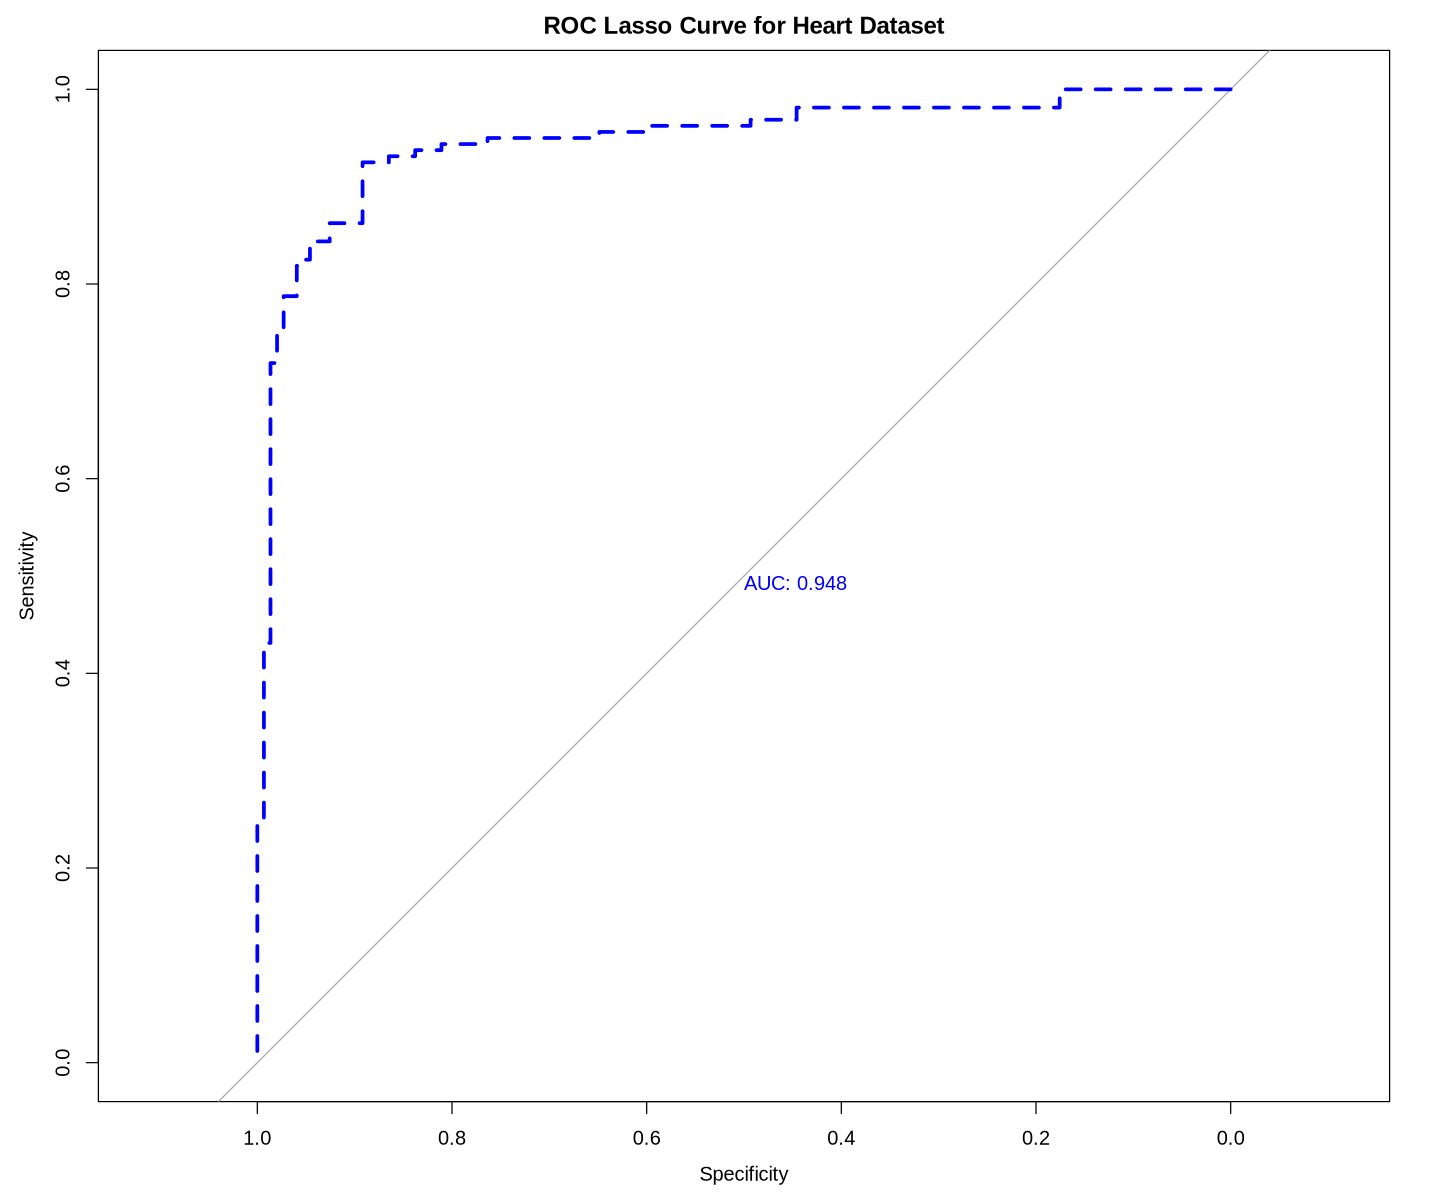

In [60]:
# Main developer: Anna M. 
# Contributor: None

plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Lasso Curve for Heart Dataset"
)

In [61]:
# Main developer: Anna M. 
# Contributor: None

# Checking if there is imbalance in the dataset
table(heart_data$target)


  0   1 
499 526 

### Subset of variables

In [65]:
# Main developer: Vaibhav S.
# Contributor: None

set.seed(584)

train_index <- createDataPartition(heart_data$target, p = 0.8, list = FALSE)
train_data <- heart_data[train_index, ]
test_data <- heart_data[-train_index, ]

# Fit logistic regression model
log_model <- glm(target ~ age + resting_bp + sex + resting_ecg + chest_pain_type, 
                 data = train_data, 
                 family = binomial)

# Summary of the model
model_summary <- summary(log_model)
print(model_summary)


Call:
glm(formula = target ~ age + resting_bp + sex + resting_ecg + 
    chest_pain_type, family = binomial, data = train_data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       5.550197   0.897428   6.185 6.23e-10 ***
age              -0.062007   0.011207  -5.533 3.15e-08 ***
resting_bp       -0.015983   0.005289  -3.022  0.00251 ** 
sex1             -1.940983   0.224897  -8.631  < 2e-16 ***
resting_ecg1      0.362951   0.182423   1.990  0.04663 *  
resting_ecg2     -1.070818   0.736995  -1.453  0.14624    
chest_pain_type1  2.438682   0.270150   9.027  < 2e-16 ***
chest_pain_type2  2.412692   0.220102  10.962  < 2e-16 ***
chest_pain_type3  2.504923   0.342594   7.312 2.64e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1137.6  on 820  degrees of freedom
Residual deviance:  772.9  on 812  degrees of freedom
AIC: 790.9

Number of Fisher Sco

In [66]:
# Main developer: Vaibhav S.
# Contributor: None


# Calculate odds ratios and confidence intervals
exp_coef <- exp(coef(log_model))  # Odds ratios
conf_int <- exp(confint(log_model))  # Confidence intervals
results_table <- cbind(Odds_Ratio = exp_coef, conf_int)

# Print the results table
print(results_table)

Waiting for profiling to be done...



                  Odds_Ratio       2.5 %       97.5 %
(Intercept)      257.2882075 45.43035309 1539.1543106
age                0.9398765  0.91910165    0.9604316
resting_bp         0.9841440  0.97382361    0.9942697
sex1               0.1435628  0.09143577    0.2210417
resting_ecg1       1.4375652  1.00551602    2.0573171
resting_ecg2       0.3427282  0.06816614    1.3290262
chest_pain_type1  11.4579258  6.83686514   19.7615533
chest_pain_type2  11.1639725  7.31515341   17.3549440
chest_pain_type3  12.2426164  6.35138111   24.4310298


In [68]:
# Main developer: Vaibhav S.
# Contributor: None

# Predict on the test set and calculate accuracy
library(pROC)
test_data$predicted <- ifelse(predict(log_model, newdata = test_data, type = "response") > 0.5, 1, 0)
conf_matrix <- table(test_data$target, test_data$predicted)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
roc_curve <- roc(test_data$target, predict(log_model, newdata = test_data, type = "response"))
cat("Model Accuracy: ", accuracy, "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Model Accuracy:  0.7794118 


In [69]:
# Main developer: Vaibhav S.
# Contributor: None

auc_value <- auc(roc_curve)
cat("AUC: ", auc_value, "\n")

AUC:  0.8571429 


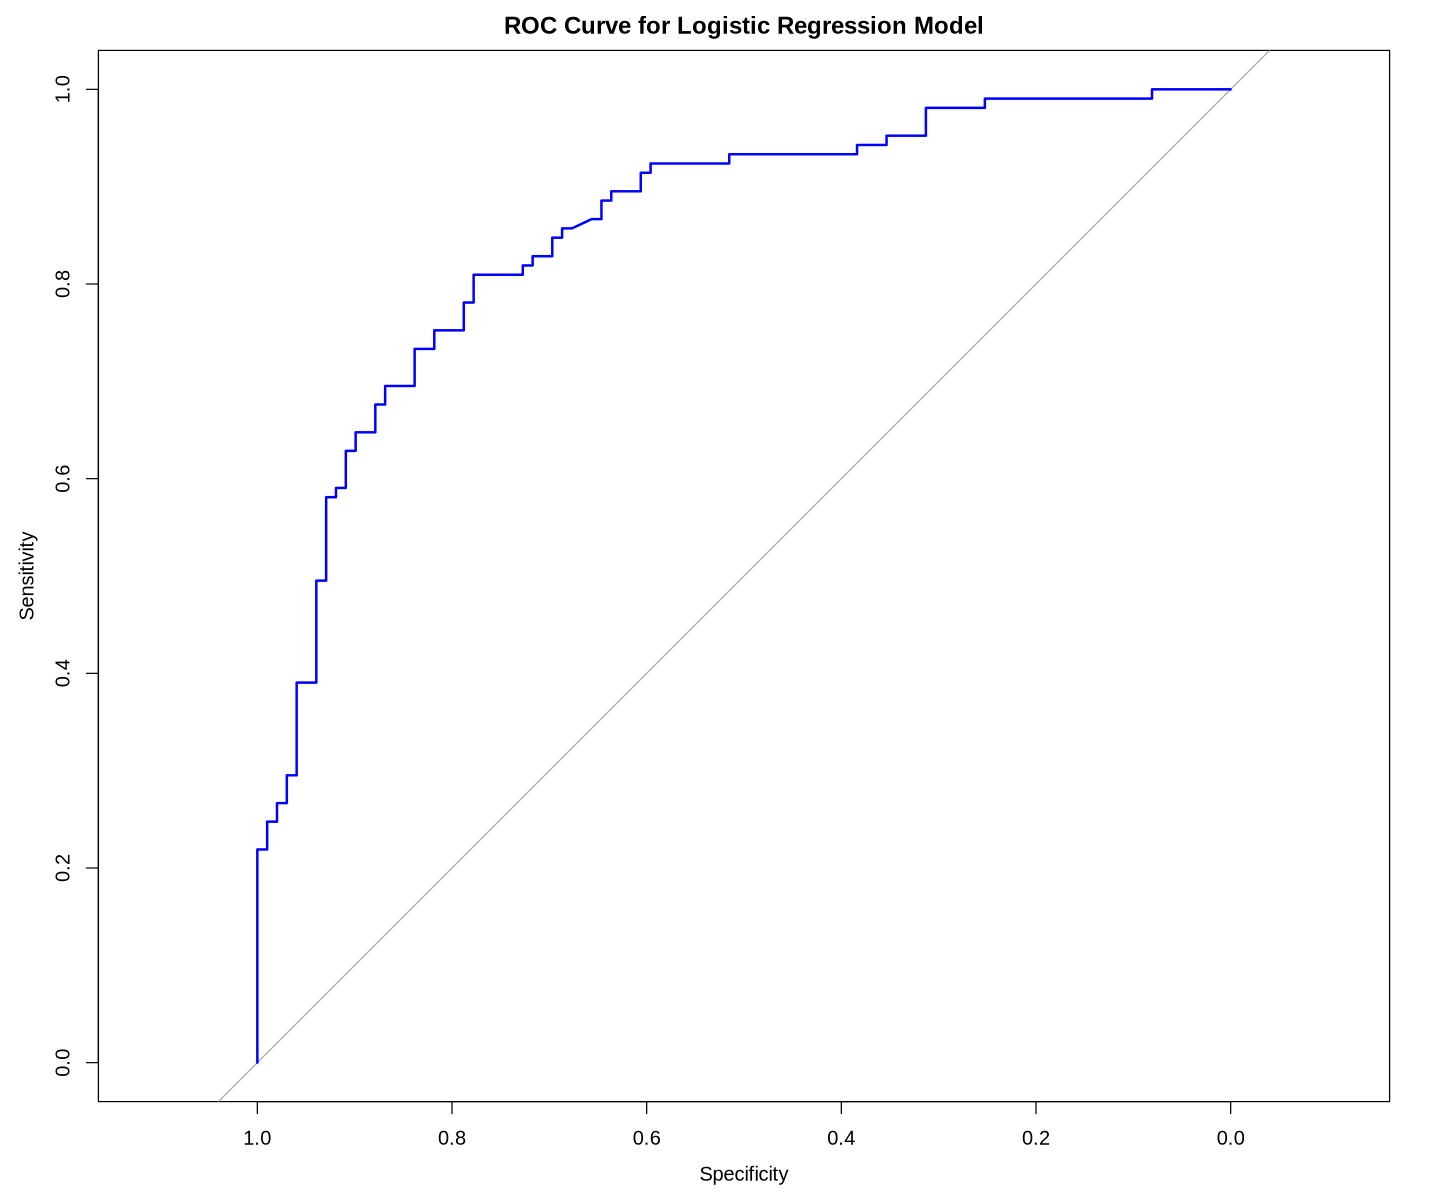

In [70]:
# Main developer: Vaibhav S.
# Contributor: Michelle H. 

# Ensure target variable is a factor with correct levels
test_data$target <- factor(test_data$target, levels = c(0, 1))
plot(roc_curve, main = "ROC Curve for Logistic Regression Model", col = "blue", lwd = 2)

In [76]:
# Main developer: Anna M. 
# Contributor: Michelle H. 

model_names <- c("Backwards selection and Logistic", "Lasso Regression", "Forward Selection and Logistic", "Logistic for Subset")
prediction_accuracy <- c(0.8661, 0.8864, 0.8884, 0.7794)
AUC <- c(0.942, 0.9477, 0.944, 0.8571)
tibble(model_names, prediction_accuracy, AUC)

model_names,prediction_accuracy,AUC
<chr>,<dbl>,<dbl>
Backwards selection and Logistic,0.8661,0.9420
Lasso Regression,0.8864,0.9477
Forward Selection and Logistic,0.8884,0.9440
Logistic for Subset,0.7794,0.8571


# Discussion

# References 

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

Menees, D. S., & Bates, E. R. (2010). Evaluation of patients with suspected coronary artery disease. Coronary Artery Disease, 21(7), 386. https://doi.org/10.1097/MCA.0b013e32833bfdf7

Public Health Agency of Canada. (2017, February 10). Heart Disease in Canada [Education and awareness]. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html
